# GLF Demo.

In this notebook, we show the samples from the latent space of a trained GLF. We use the model which was trained on CelebA dataset for 40 epochs. The dimensionality of the hidden space is 64.

In [1]:
import sys
sys.path.append('../')

In [2]:
from glf.models.archs.GLF_arch import Decoder, FlowNet

import torch
import matplotlib.pyplot as plt

In [3]:
nz = 64
img_size = 64
hidden_size = 256

In [4]:
D = Decoder(img_size=img_size, out_ch=3, nz=nz)
F = FlowNet(nz=nz, hidden_size=hidden_size)

D.load_state_dict(torch.load('../experiments/glf_original_celeba/models/latest_D.pth'))
F.load_state_dict(torch.load('../experiments/glf_original_celeba/models/latest_F.pth'))

D = D.eval()
F = F.eval()

## Samples

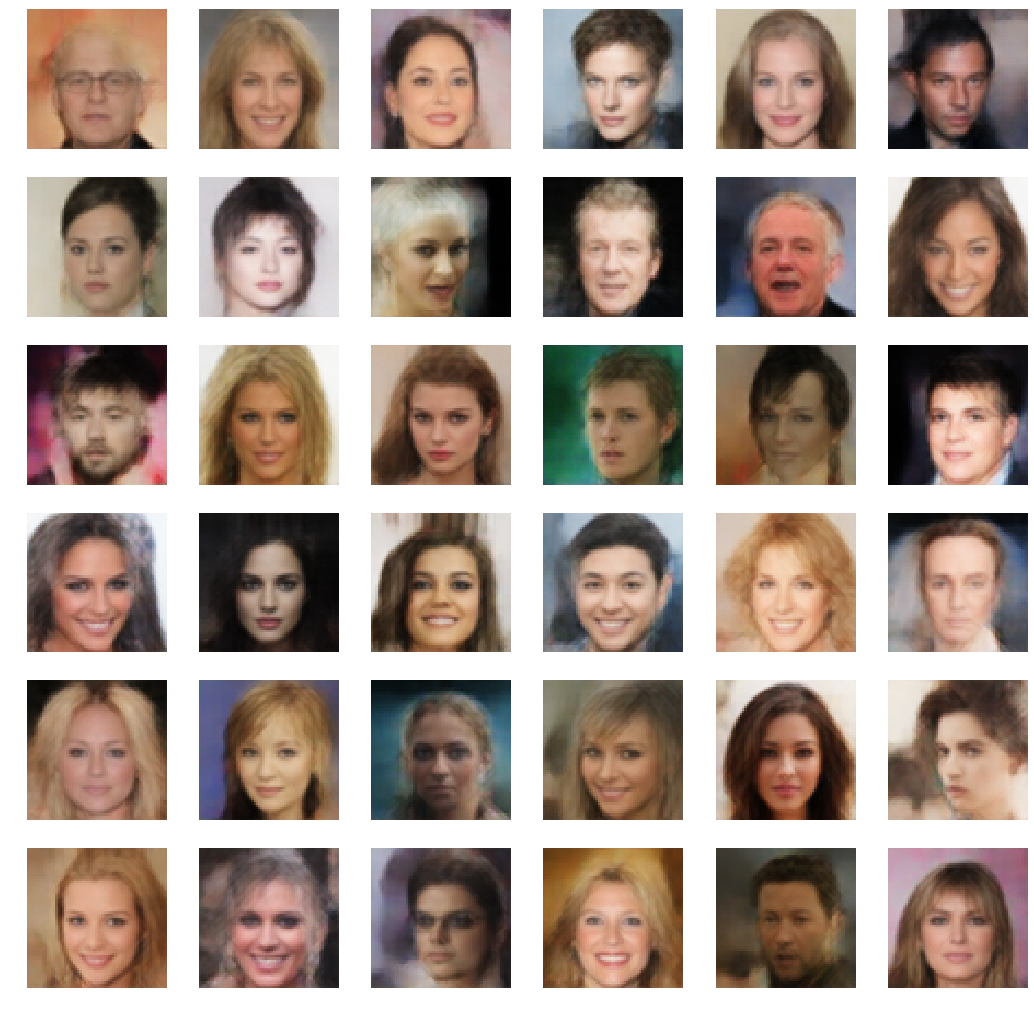

In [34]:
with torch.no_grad():
    noise = torch.randn(36, nz)
    x = D(F.reverse(noise))
    samples = x.detach().float().permute(0,2,3,1).numpy()
    
fig, axes = plt.subplots(6,6, figsize=(18,18))
for i, ax in enumerate(axes.flat):
    ax.imshow(samples[i])
    ax.axis('off')

We can also check that the latent space learned by the model differs from the unit Gaussian by dropping the Flow networks and sampling directly from the unit Gaussian.

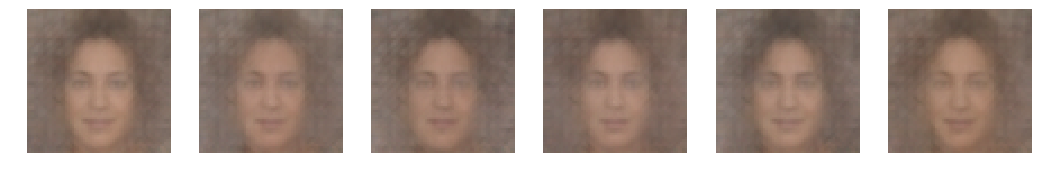

In [33]:
with torch.no_grad():
    noise = torch.randn(6, nz)
    x = D(noise)
    pseudosamples = x.detach().float().permute(0,2,3,1).numpy()
    
fig, axes = plt.subplots(1,6, figsize=(18,3))
for i, ax in enumerate(axes.flat):
    ax.imshow(pseudosamples[i])
    ax.axis('off')

## Interpolation

Here we sample two random latent vectors and interpolate between them on some curve in the latent space.

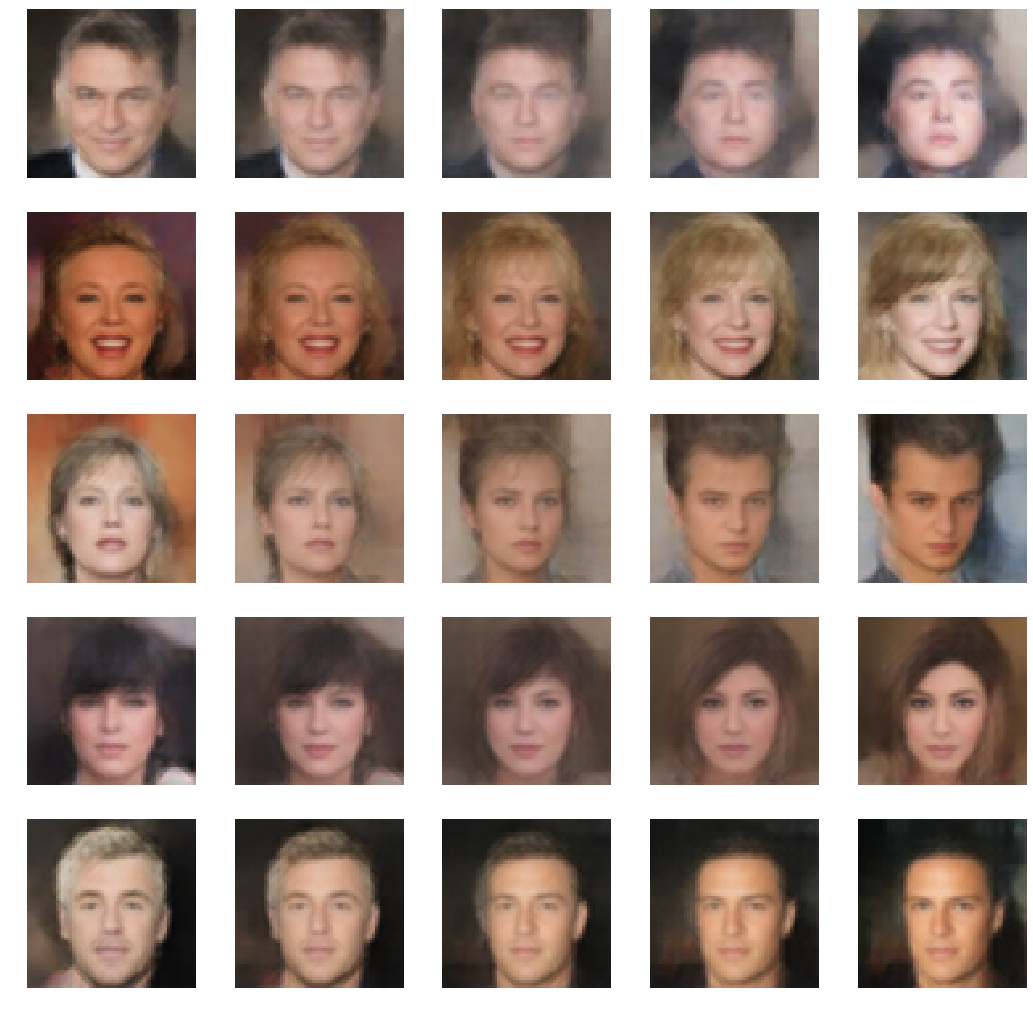

In [23]:
alphas = torch.linspace(0, 1, 5)
fig, axes = plt.subplots(5, alphas.shape[0], figsize=(18,18))

for i in range(5):
    noise1 = torch.randn(nz)
    noise2 = torch.randn(nz)
    for j, alpha in enumerate(alphas):
        noise = alpha*noise1 + (1-alpha)*noise2
        sample = D(F.reverse(noise.unsqueeze(0)))
        sample = sample.squeeze(0).detach().float().permute(1,2,0).numpy()
        
        axes[i,j].imshow(sample)
        axes[i,j].axis('off')